#  Hierarchical clustering 29 March

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Reading the data

In [2]:
df = pd.read_csv(r"C:\Users\rezaa\Videos\Captures\11.Machine Learning\2.K-MEANS CLUSTERING\2.K-MEANS CLUSTERING\Mall_Customers.csv")
df = df.drop(['CustomerID'],axis=1)
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Data visualization

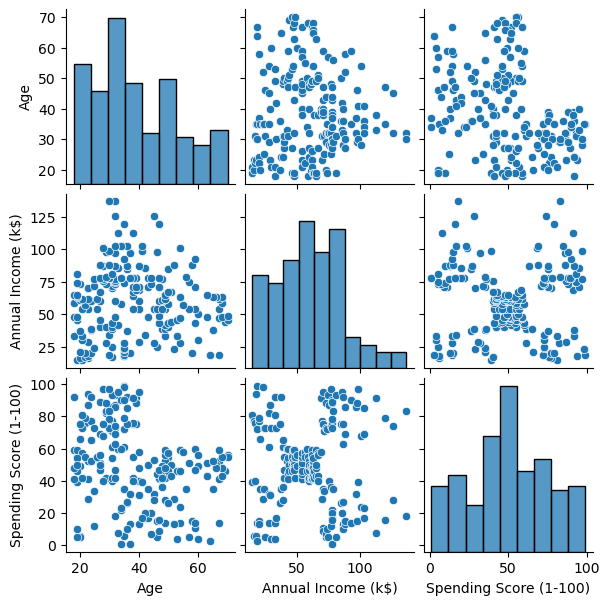

In [3]:
g = sns.pairplot(data=df)
g.fig.set_size_inches(6, 6)

**Conclusion:** Frrom the above plot it is clear that there is clustering of data between Annual Income and Spending Score

## Spliting the data

In [4]:
X = df.loc[:,['Annual Income (k$)', 'Spending Score (1-100)']].values
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X,test_size=0.2, random_state=0)

## Creating dendrograph

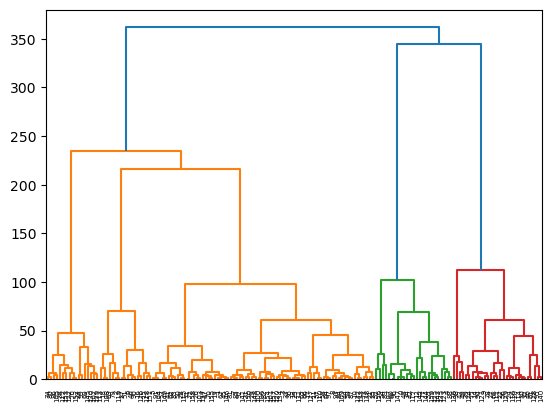

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(X_train, method='ward', metric='euclidean', 
                                    optimal_ordering=False)

den = dendrogram(z, p=30, truncate_mode=None, color_threshold=None, 
                 get_leaves=True, orientation='top', labels=None, 
                 count_sort=False, distance_sort=False, 
                 show_leaf_counts=True, no_plot=False, 
                 no_labels=False, leaf_font_size=None, 
                 leaf_rotation=None, leaf_label_func=None, 
                 show_contracted=False, link_color_func=None, 
                 ax=None, above_threshold_color='C0')

**Conclusion**: From the above plot it is clear that after number of clusters **3**

## Trainning the model

In [6]:
from sklearn.cluster import AgglomerativeClustering

model_AG = AgglomerativeClustering(n_clusters=3, metric='euclidean', 
                                   memory=None, connectivity=None, 
                                   compute_full_tree='auto', linkage='ward', 
                                   distance_threshold=None, compute_distances=False)

## Ploting the clusters

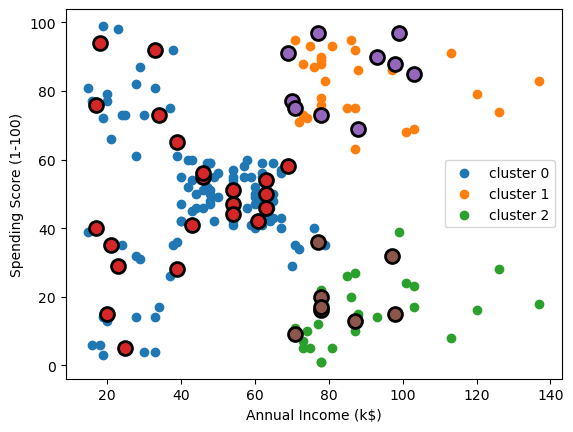

In [7]:
num_clus = 3
y_pred = model_AG.fit_predict(X_train)
y_test = model_AG.fit_predict(X_test)
for n in range(num_clus):
    plt.scatter(X_train[:,0][y_pred==n],X_train[:,1][y_pred==n],label=f'cluster {n}')
  
for n in range(num_clus):
    plt.scatter(X_test[:,0][y_test==n],X_test[:,1][y_test==n],edgecolor='black',s=100,
                linewidth=2)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();